In [27]:
# pip install folium
!pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 22.7/22.7 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [19]:
# Import the CSV file into a Pandas DataFrame
Balt_crime = pd.read_csv("Crime_Data_7_22_2023.csv")

C:\Users\stean\AppData\Local\Temp\ipykernel_23964\133663892.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  Balt_crime = pd.read_csv("Crime_Data_7_22_2023.csv")


Overview of first dataset

In [3]:
Balt_crime.head()

,RowID,CCNO,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
0,1,23F08231,2023/06/24 04:01:00+00,4B,600 LUCIA AVE,AGG. ASSAULT,NaN,PERSONAL_WEAPONS,833.0,F,15.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,SOUTHWEST,YALE HEIGHTS,39.273302,-76.692439,"(39.27330200992213,-76.69243902745305)",NaN,1
1,2,23F08231,2023/06/24 04:01:00+00,4B,600 LUCIA AVE,AGG. ASSAULT,NaN,PERSONAL_WEAPONS,833.0,F,15.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,SOUTHWEST,YALE HEIGHTS,39.273302,-76.692439,"(39.27330200992213,-76.69243902745305)",NaN,1
2,3,23F08231,2023/06/24 04:01:00+00,4B,600 LUCIA AVE,AGG. ASSAULT,NaN,PERSONAL_WEAPONS,833.0,F,27.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,SOUTHWEST,YALE HEIGHTS,39.273302,-76.692439,"(39.27330200992213,-76.69243902745305)",NaN,1
3,4,23F08231,2023/06/24 04:01:00+00,3JK,600 LUCIA AVE,ROBBERY,NaN,PERSONAL_WEAPONS,833.0,M,25.0,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,SOUTHWEST,YALE HEIGHTS,39.273302,-76.692439,"(39.27330200992213,-76.69243902745305)",NaN,1
4,5,23F08235,2023/06/24 03:45:00+00,5A,3200 LILY AVE,BURGLARY,NaN,NaN,922.0,M,48.0,NaN,HISPANIC_OR_LATINO,SOUTHERN,CHERRY HILL,39.246432,-76.636819,"(39.24643210111462,-76.63681903810716)",NaN,1


Checking for null values in the Dataset

In [4]:
null_values = Balt_crime.isnull().sum()
print(null_values)

RowID                   0
CCNO                    0
CrimeDateTime           0
CrimeCode               0
Location             2813
Description             0
Inside_Outside     101955
Weapon             438860
Post                 8140
Gender              91747
Age                114166
Race                13631
Ethnicity          540192
District             8084
Neighborhood         8255
Latitude              904
Longitude             904
GeoLocation             0
Premise            102291
Total_Incidents         0
dtype: int64


Deciding what to do with this many null values, I think what to do will depened on what the feature is

In [5]:
# Identify any columns with a large number of null values
columns_with_many_nulls = null_values[null_values > Balt_crime.shape[0] / 10]
print(columns_with_many_nulls)

Inside_Outside    101955
Weapon            438860
Gender             91747
Age               114166
Ethnicity         540192
Premise           102291
dtype: int64


Below are the total number of crimes for each type of crime recorded

In [6]:
# Calculate the number of crimes of each type
crime_counts = Balt_crime['Description'].value_counts()
print(crime_counts)

LARCENY                 125347
COMMON ASSAULT          104189
BURGLARY                 78457
LARCENY FROM AUTO        73237
AGG. ASSAULT             64981
AUTO THEFT               49971
ROBBERY                  45445
SHOOTING                  6312
ROBBERY - COMMERCIAL      5938
ROBBERY - CARJACKING      4909
RAPE                      3854
HOMICIDE                  3449
ARSON                     2525
Name: Description, dtype: int64


Creating a map to display crime locations

In [21]:
# Create a Folium map
m = folium.Map(location=[39.2833, -76.6167], zoom_start=13)

# Add a marker for each crime location
for row in Balt_crime.iterrows():
    latitude = Balt_crime['Latitude']
    longitude = Balt_crime['Longitude']
    location = (latitude, longitude)
    crime_type = Balt_crime['Description']
    folium.Marker(location, popup=crime_type).add_to(m)

# Add a layer of neighborhood boundaries
folium.GeoJson(open('Baltimore_Neighborhoods.json'), name='Neighborhoods').add_to(m)

# Customize the map
m.add_child(folium.map.LayerControl())
m.add_child(folium.map.FullScreenControl())

# Display the map
display(m)

ValueError: Location should consist of two numerical values, but 0         39.273302
1         39.273302
2         39.273302
3         39.273302
4         39.246432
            ...    
568609    39.331681
568610    39.256270
568611    39.297945
568612    39.304108
568613    39.290164
Name: Latitude, Length: 568614, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [3]:
import folium

# Create a Folium map
m = folium.Map(location=[39.2833, -76.6167], zoom_start=13)

# Limit the iteration to the first 100 rows
for index, row in Balt_crime.head(100).iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    location = (latitude, longitude)
    crime_type = row['Description']
    folium.Marker(location, popup=crime_type).add_to(m)

# Add a layer of neighborhood boundaries
folium.GeoJson(open('Baltimore_Neighborhoods.json'), name='Neighborhoods').add_to(m)

# Customize the map
m.add_child(folium.map.LayerControl())
m.add_child(folium.map.FullScreenControl())

# Display the map
display(m)

FileNotFoundError: [Errno 2] No such file or directory: 'Baltimore_Neighborhoods.json'

Map file too big, crashes chrome. Look for alternative

In [19]:
# Create a Folium map
m = folium.Map()

# Add a marker to the map
folium.Marker((39.2833, -76.6167), popup='Baltimore, MD').add_to(m)

# Display the map
display(m)


Crime with highest occurrence 

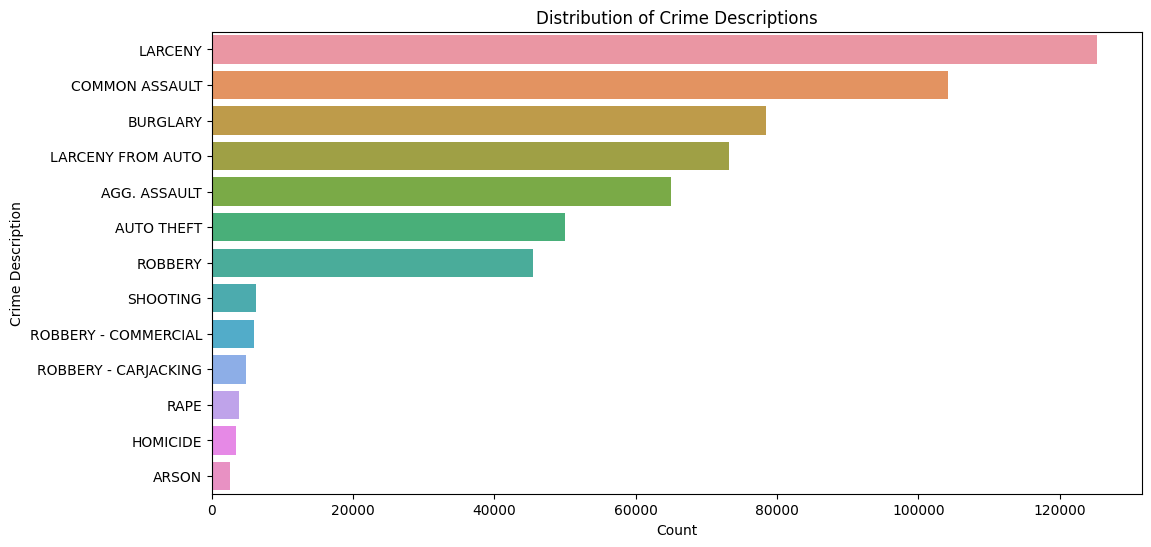

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Balt_crime, y="Description", order=Balt_crime["Description"].value_counts().index)
plt.title("Distribution of Crime Descriptions")
plt.xlabel("Count")
plt.ylabel("Crime Description")
plt.show()


Number of crimes by the hours of the day

C:\Users\stean\AppData\Local\Temp\ipykernel_23964\2502476024.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Balt_crime.loc[:, 'CrimeDateTime'] = pd.to_datetime(Balt_crime['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S+00')
C:\Users\stean\AppData\Local\Temp\ipykernel_23964\2502476024.py:14: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Balt_crime.loc[:, 'CrimeDateTime'] = pd.to_datetime(Balt_crime['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S+00')
C:\Users\stean\AppData\Local\Temp\ipykernel_23964\2502476024.py:17: SettingWithCop

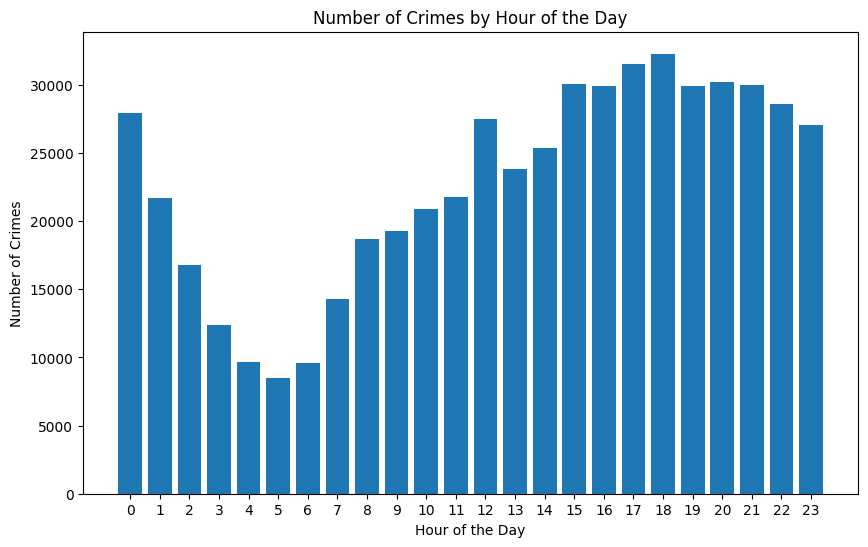

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded your dataset into a DataFrame named 'Balt_crime'

# Filter out datetime values that are outside a reasonable range
# For example, let's consider data from 2000 to 2023
start_date = '2000-01-01 00:00:00'
end_date = '2023-09-26 23:59:59'
Balt_crime = Balt_crime[(Balt_crime['CrimeDateTime'] >= start_date) & (Balt_crime['CrimeDateTime'] <= end_date)]

# Convert the 'CrimeDateTime' column to a datetime data type
Balt_crime.loc[:, 'CrimeDateTime'] = pd.to_datetime(Balt_crime['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S+00')

# Extract the hour from the 'CrimeDateTime' column
Balt_crime['Hour'] = Balt_crime['CrimeDateTime'].dt.hour

# Count the number of crimes for each hour and sort by hour
crime_counts_by_hour = Balt_crime['Hour'].value_counts().sort_index()

# Ensure all hours are in the index
all_hours = np.arange(24)
crime_counts_by_hour = crime_counts_by_hour.reindex(all_hours, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(crime_counts_by_hour.index, crime_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour of the Day')
plt.xticks(np.arange(24))
plt.show()


Top 10 Hours with the Most Recorded Crimes

C:\Users\stean\AppData\Local\Temp\ipykernel_20904\439320841.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Balt_crime['CrimeDateTime'] = pd.to_datetime(Balt_crime['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S+00')
C:\Users\stean\AppData\Local\Temp\ipykernel_20904\439320841.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Balt_crime['Hour'] = Balt_crime['CrimeDateTime'].dt.hour


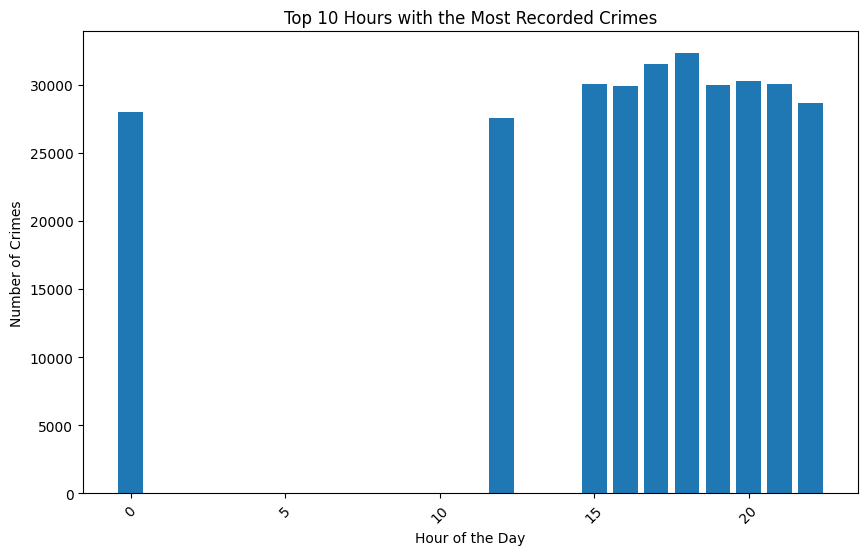

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame
# Replace 'df' with your actual DataFrame name

# Filter out datetime values that are outside a reasonable range
# For example, let's consider data from 2000 to 2023
start_date = '2000-01-01 00:00:00'
end_date = '2023-09-26 23:59:59'
Balt_crime = Balt_crime[(Balt_crime['CrimeDateTime'] >= start_date) & (Balt_crime['CrimeDateTime'] <= end_date)]

# Convert the 'CrimeDateTime' column to a datetime data type
Balt_crime['CrimeDateTime'] = pd.to_datetime(Balt_crime['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S+00')

# Extract the hour from the 'CrimeDateTime' column
Balt_crime['Hour'] = Balt_crime['CrimeDateTime'].dt.hour

# Count the number of crimes for each hour
crime_counts_by_hour = Balt_crime['Hour'].value_counts()

# Get the top 10 hours with the most recorded crimes
top_hours = crime_counts_by_hour.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_hours.index, top_hours.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Hours with the Most Recorded Crimes')
plt.xticks(rotation=45)
plt.show()

Check for data of race occupying areas

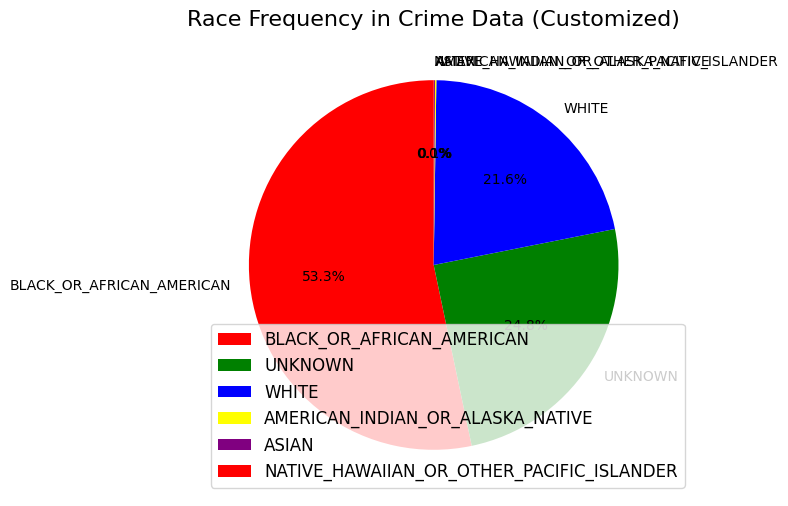

In [12]:
race_frequency = Balt_crime['Race'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(race_frequency.values, labels=race_frequency.index, autopct="%1.1f%%", colors=['red', 'green', 'blue', 'yellow', 'purple'], startangle=90)
plt.title("Race Frequency in Crime Data (Customized)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

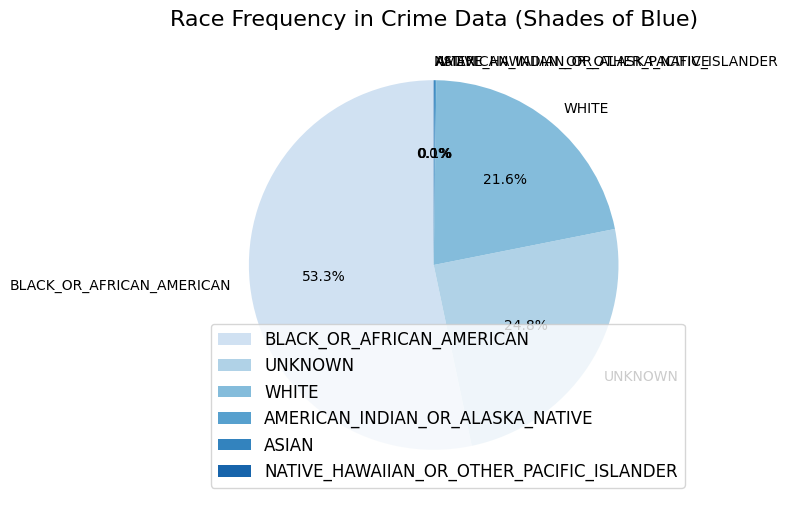

In [11]:
# Count the frequency of each race
race_frequency = Balt_crime['Race'].value_counts()

# Define a colormap with different shades of one color (e.g., 'blue')
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(race_frequency)))

plt.figure(figsize=(8, 6))
plt.pie(
    race_frequency.values,
    labels=race_frequency.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
)
plt.title("Race Frequency in Crime Data (Shades of Blue)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

#### Check with dataset containing prices if crime rates affect the cost of houses

District with highest crime rate

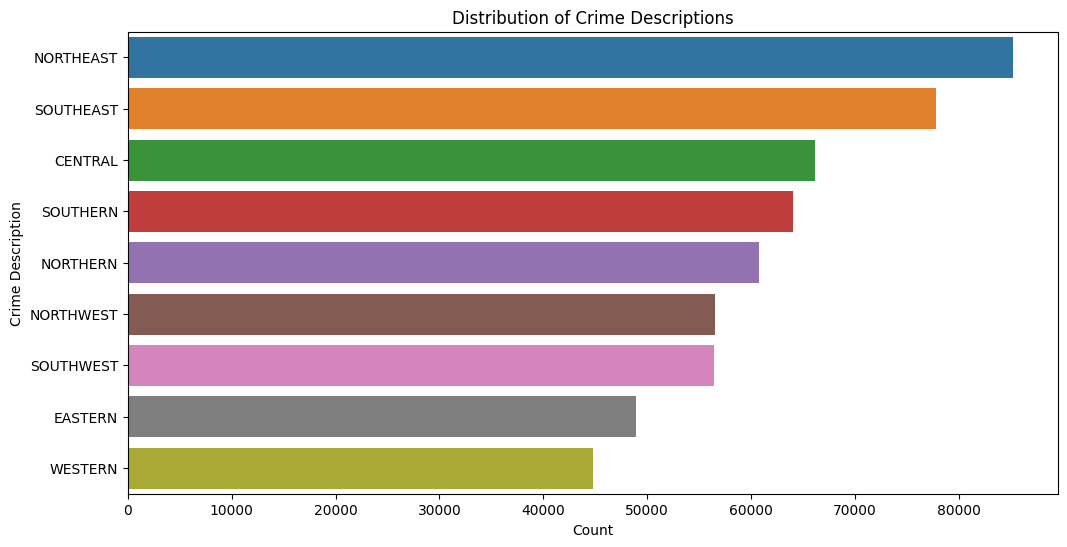

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Balt_crime, y="District", order=Balt_crime["District"].value_counts().index)
plt.title("Distribution of Crime Descriptions")
plt.xlabel("Count")
plt.ylabel("Crime Description")
plt.show()

Neighbourhoods with over 4000 incidents recorded

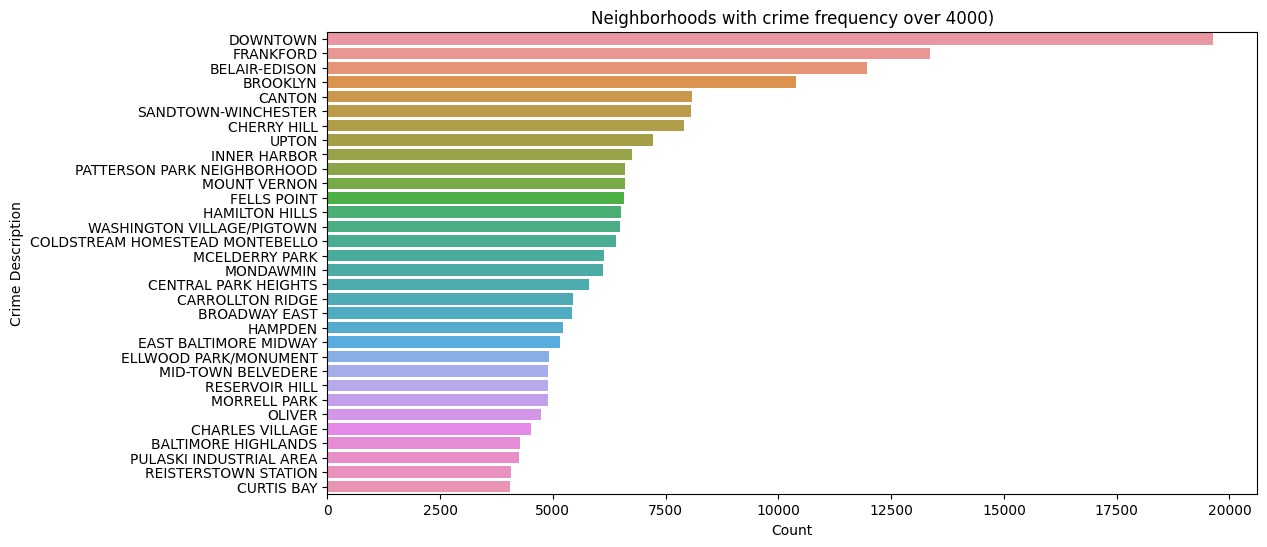

In [34]:
# Filter the neighborhoods with a frequency over 5000
neighborhood_counts = Balt_crime['Neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts[neighborhood_counts > 4000]

# Filter the DataFrame to include only the selected neighborhoods
filtered_df = Balt_crime[Balt_crime['Neighborhood'].isin(neighborhood_counts.index)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y="Neighborhood", order=filtered_df["Neighborhood"].value_counts().index)
plt.title("Neighborhoods with crime frequency over 4000)")
plt.xlabel("Count")
plt.ylabel("Crime Description")
plt.show()

Districts with highest crime rates recorded

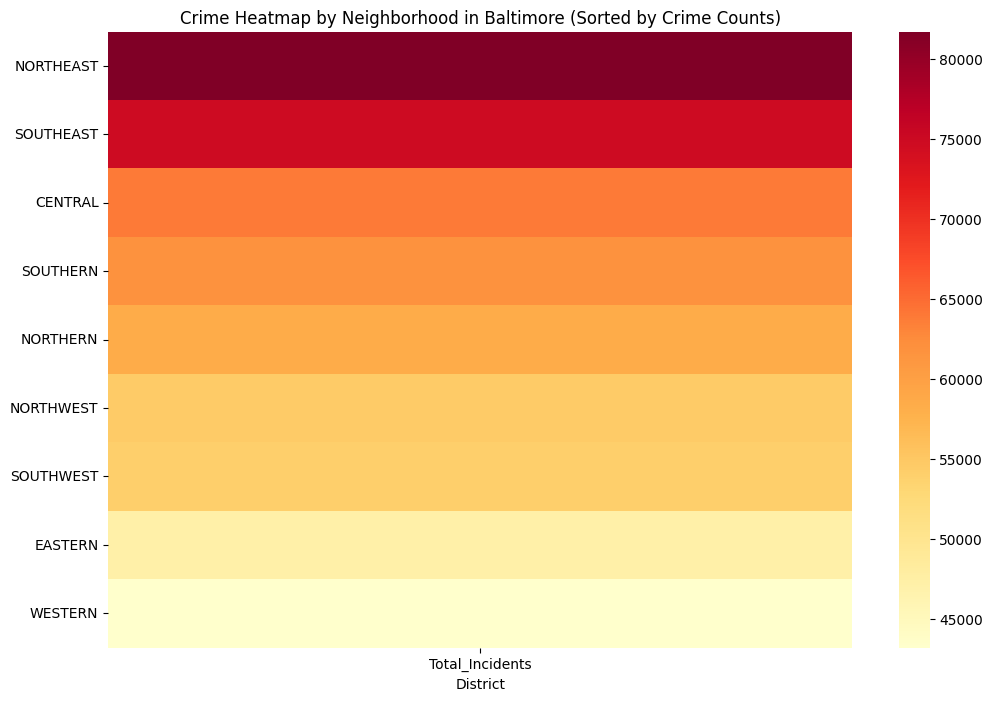

In [19]:
# Create a pivot table to aggregate the total number of incidents (crimes) in each district
crime_by_district = Balt_crime.groupby('District')['Total_Incidents'].sum().reset_index()

# Sort the districts by crime counts in descending order
crime_by_district = crime_by_district.sort_values(by='Total_Incidents', ascending=False)

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap and specify the order of rows based on sorted districts
sns.heatmap(
    Balt_crime.pivot_table(index='District', values='Total_Incidents', aggfunc='sum').loc[crime_by_district['District']],
    cmap='YlOrRd'
)

# Set the title and labels
plt.title('Crime Heatmap by Neighborhood in Baltimore (Sorted by Crime Counts)')
plt.xlabel('District')
plt.ylabel('')

# Show the plot
plt.show()


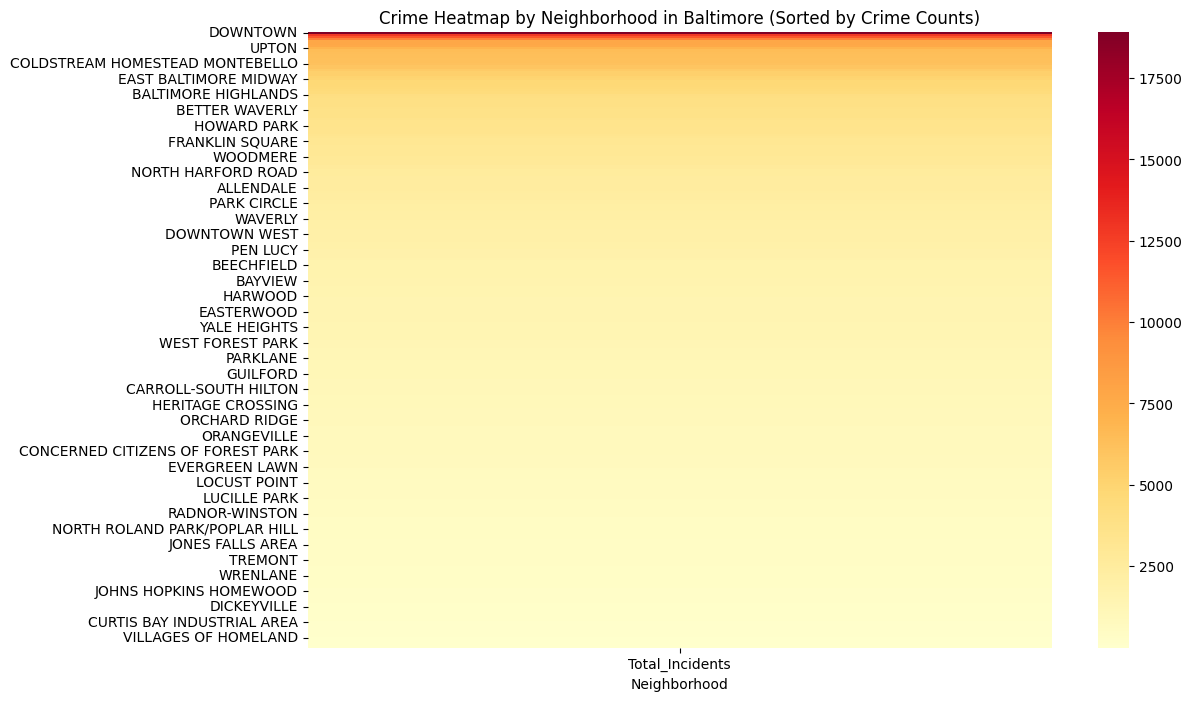

In [25]:
# Create a pivot table to aggregate the total number of incidents (crimes) in each neighborhood
crime_by_neighborhood = Balt_crime.groupby('Neighborhood')['Total_Incidents'].sum().reset_index()

# Sort the neighborhoods by crime counts in descending order
crime_by_neighborhood = crime_by_neighborhood.sort_values(by='Total_Incidents', ascending=False)

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap and specify the order of rows based on sorted neighborhoods
sns.heatmap(
    Balt_crime.pivot_table(index='Neighborhood', values='Total_Incidents', aggfunc='sum').loc[crime_by_neighborhood['Neighborhood']],
    cmap='YlOrRd'
)

# Set the title and labels
plt.title('Crime Heatmap by Neighborhood in Baltimore (Sorted by Crime Counts)')
plt.xlabel('Neighborhood')
plt.ylabel('')

# Show the plot
plt.show()

I am not sure why i do not see some of the Neighbourhoods in above code below

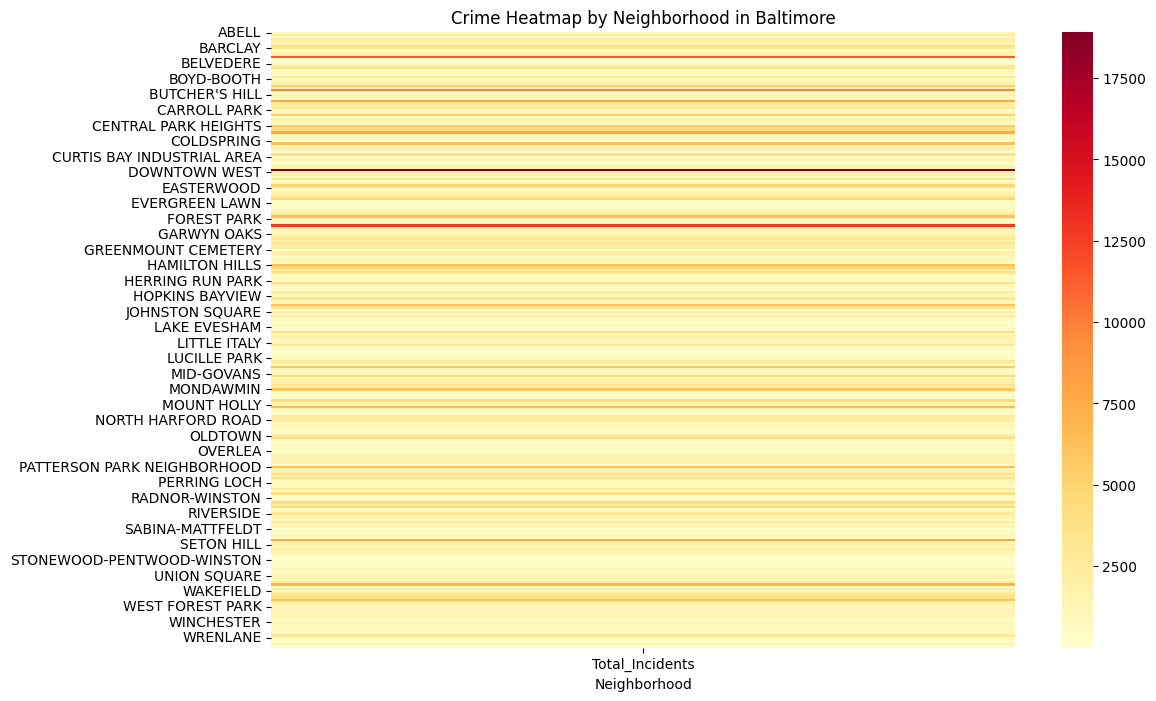

In [28]:
crime_by_neighborhood = Balt_crime.groupby('Neighborhood')['Total_Incidents'].sum().reset_index()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(crime_by_neighborhood.pivot_table(index='Neighborhood', values='Total_Incidents', aggfunc='sum'), cmap='YlOrRd')

# Set the title and labels
plt.title('Crime Heatmap by Neighborhood in Baltimore')
plt.xlabel('Neighborhood')
plt.ylabel('')

# Show the plot
plt.show()


#### Creating average crime per month by neighboorhood 

In [24]:
import pandas as pd

# Assuming you have a DataFrame named Balt_crime with a 'CrimeDateTime' column in datetime format
# Assuming you also have a 'Description' column that represents the name of the crimes

# Extract the year and month from the 'CrimeDateTime' column
Balt_crime['YearMonth'] = Balt_crime['CrimeDateTime'].dt.to_period('M')

# Group the data by neighborhood, year-month, and crime description, and calculate the average crime count
crime_by_neighborhood_month_description = Balt_crime.groupby(['Neighborhood', 'YearMonth', 'Description'])['RowID'].count().reset_index()
crime_by_neighborhood_month_description.rename(columns={'RowID': 'AverageCrimeCount'}, inplace=True)

# Pivot the table to create a table of neighborhoods as rows, year-months as columns, and crime descriptions as values
crime_table = crime_by_neighborhood_month_description.pivot_table(index=['Neighborhood', 'YearMonth'], columns='Description', values='AverageCrimeCount', aggfunc='mean', fill_value=0)

# Reset the index to make 'Neighborhood' and 'YearMonth' columns regular columns
crime_table.reset_index(inplace=True)

# Fill NaN values with 0 (for neighborhoods with no recorded incidents of a specific crime description in some months)
crime_table = crime_table.fillna(0)

# Calculate the total average per month for each crime description by neighborhood
total_average_by_neighborhood = crime_table.groupby('Neighborhood').mean()

# Print the resulting table
print(total_average_by_neighborhood)



C:\Users\stean\AppData\Local\Temp\ipykernel_23964\2622468432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Balt_crime['YearMonth'] = Balt_crime['CrimeDateTime'].dt.to_period('M')


Description        AGG. ASSAULT     ARSON  AUTO THEFT  BURGLARY  \
Neighborhood                                                      
ABELL                  0.776224  0.055944    0.538462  1.447552   
ALLENDALE              2.379310  0.075862    1.786207  2.951724   
ARCADIA                0.475177  0.014184    0.397163  0.865248   
ARLINGTON              2.472222  0.118056    1.243056  2.597222   
ARMISTEAD GARDENS      1.409722  0.187500    1.555556  2.381944   
...                         ...       ...         ...       ...   
WRENLANE               0.515873  0.007937    0.261905  0.285714   
WYMAN PARK             0.043796  0.000000    0.306569  0.503650   
WYNDHURST              0.056452  0.016129    0.153226  0.411290   
YALE HEIGHTS           1.166667  0.062500    1.381944  1.416667   
YORK-HOMELAND          0.313131  0.010101    0.171717  0.232323   

Description        COMMON ASSAULT  HOMICIDE   LARCENY  LARCENY FROM AUTO  \
Neighborhood                                        

C:\Users\stean\AppData\Local\Temp\ipykernel_23964\2622468432.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_average_by_neighborhood = crime_table.groupby('Neighborhood').mean()


In [25]:
# Specify the file name only (no path) for the current working directory
file_name = 'crime_table3.csv'

# Save the 'crime_table' as a CSV file in the current working directory
total_average_by_neighborhood.to_csv(file_name)

# Print a confirmation message
print(f'The crime table has been saved as {file_name} in the current working directory')


The crime table has been saved as crime_table3.csv in the current working directory
